In [9]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv("movies_plot.csv")

# Print out the first rows of papers
papers.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [10]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Plot'].head())

# Remove punctuation
papers['title_processed'] = papers['Plot'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    Cable Hogue is isolated in the desert, awaitin...
1    In the far reaches of space, a planet explodes...
2    Zarra Montalvo is the daughter of an American ...
3    Major Vic Deakins (John Travolta) and Captain ...
4    Dolemite is a pimp and nightclub owner who is ...
Name: Plot, dtype: object


0    cable hogue is isolated in the desert awaiting...
1    in the far reaches of space a planet explodes ...
2    zarra montalvo is the daughter of an american ...
3    major vic deakins (john travolta) and captain ...
4    dolemite is a pimp and nightclub owner who is ...
Name: title_processed, dtype: object

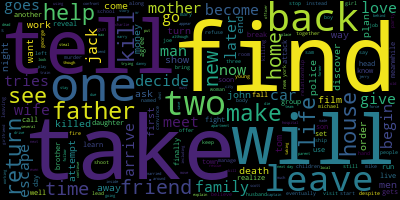

In [11]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

/Users/shpenev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


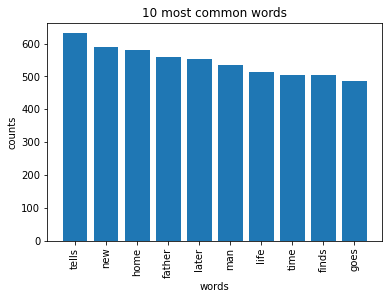

In [12]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [15]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
scott police tells man father new sam time home family away night goes takes life

Topic #1:
tom man life new later jerry tells men father home john money tries love help

Topic #2:
police father tells joe life family later mary car new home dan time finds mother

Topic #3:
home tells later house time finds new mike film goes mother night billy day life

Topic #4:
jack tells new home house father finds car wife max goes man christine takes later


/Users/shpenev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
